# **Import Needed Libraries**

In [1]:
!pip install artemis

In [2]:
!pip install pyartemis

In [3]:
!pip install matplotlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
import random
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

# **Load The Data**

In [5]:
df = pd.read_csv('/content/Balanced_Super_Stor_data.csv')
df

,Unnamed: 0.1,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days,Hights_Sales
0,0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427,1
1,1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427,1
2,2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472,1
3,3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023,1
4,4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,4105,1704,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.782308,0.0,0.690145,1.756472,0
4106,4106,603,-0.203147,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.156366,-0.957784,-0.653045,0.0,0.690145,0.617023,0
4107,4107,504,0.705444,0.470057,0.0,0.090866,0.609512,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.435775,0.0,0.690145,0.617023,0
4108,4108,1758,0.705444,0.470057,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,-0.852755,0.143983,-1.053761,0.0,0.217718,1.186748,0


# **Train The Model**

**Split the data**

In [6]:
x = df.drop(['Hights_Sales'], axis=1)
y = df['Hights_Sales']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [7]:
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [8]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_trained_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
y_pred = clf.predict(x_tested_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9829683698296837


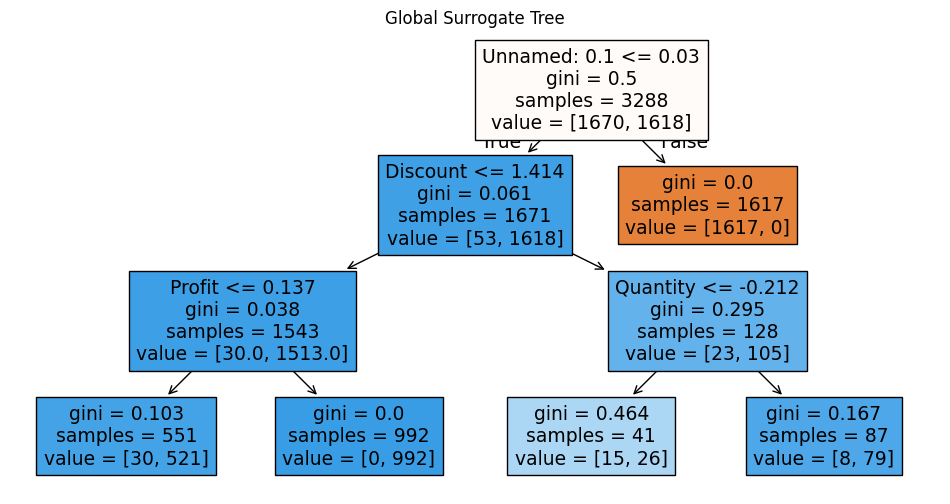

In [10]:
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X_train.columns, filled=True)
plt.title("Global Surrogate Tree")
plt.show()

# **Explainability Techniques and Interpretation**

# H-Statistic

In [17]:
random.seed(8)
X_exp = X_train.sample(n=100, random_state=8)
# Scale the sampled explanation set
X_exp_scaled = scaler.transform(X_exp)
X_exp_scaled_df = pd.DataFrame(X_exp_scaled, columns=X_train.columns)
# Fit H-statistic explainer
h_stat = FriedmanHStatisticMethod()
h_stat.fit(clf, X_exp_scaled_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

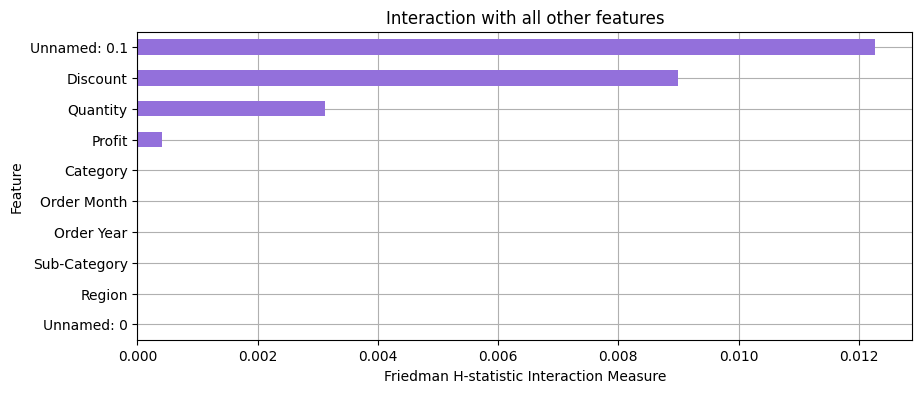

In [18]:
# Overall interaction plot
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

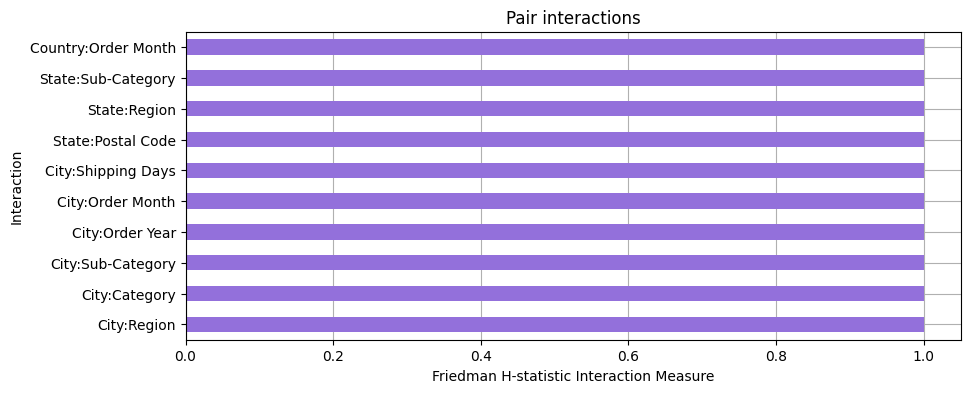

In [19]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


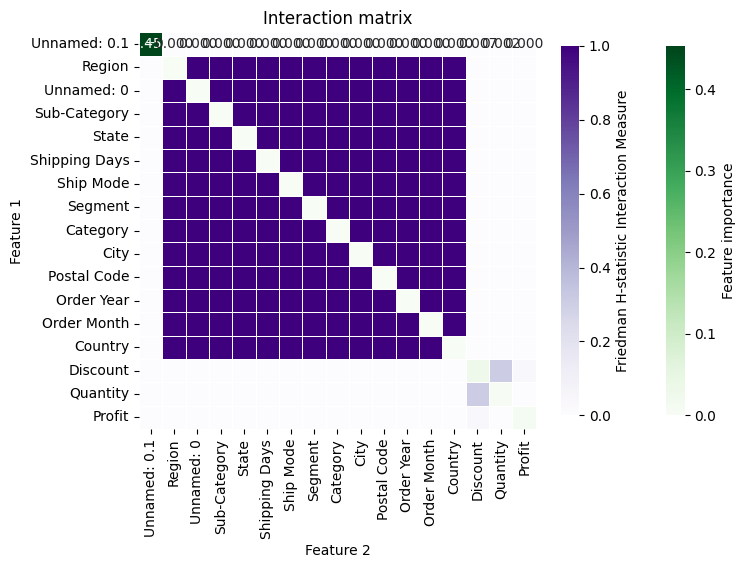

In [20]:
# Interaction heatmap
h_stat.plot()

# **PDP**

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


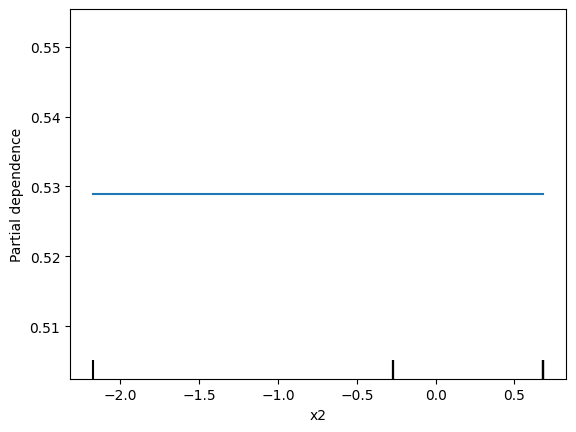

In [44]:
feature = [2]
target_class = 0
PartialDependenceDisplay.from_estimator(clf, x_tested_scaled, features=feature, target=target_class)
plt.show()

In [41]:
results = partial_dependence(clf, x_tested_scaled, [2])
print(results["average"])
print(results["grid_values"])

[[0.52892971 0.52892971 0.52892971 0.52892971]]
[array([-2.17624478, -1.22268763, -0.26913048,  0.68442666])]


# ICE

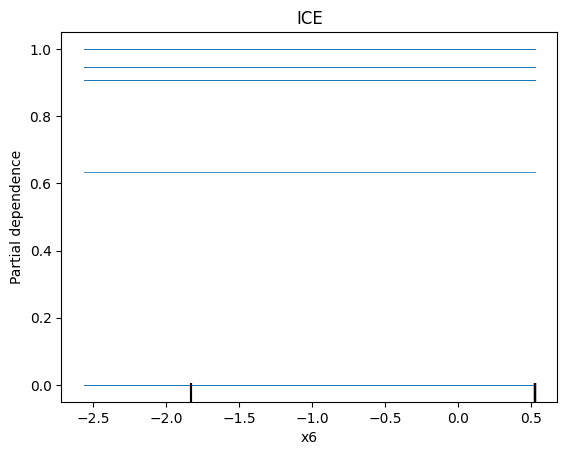

In [42]:
feature = [6]
PartialDependenceDisplay.from_estimator(clf, x_tested_scaled, features=feature, target=target_class, kind='individual')
plt.title("ICE")
plt.show()

# Lime

In [46]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d3b8bae44c2aced3eb5ac7f9e5a131bb1145514b71442ca62ce617ebe85b3979
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyartemis 0.1.5 requires networkx<3.0.0,>=2.8.8, but you have networkx 3.4.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [47]:
import lime
import lime.lime_tabular

In [55]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Low', 'High'],
    mode='classification'
)
i = 10
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=clf.predict_proba,
    num_features = 10
)
exp.show_in_notebook(show_table=True)